In [1]:
import numpy as np
from sklearn.metrics import mean_squared_error
from matplotlib import pyplot as plt


In [2]:
csv = np.genfromtxt ('train.csv', delimiter=",")

In [3]:
csv = csv[1:]

In [4]:
X = csv[:,2:] 

In [5]:
Id = csv[:,0]
print(Id)

[0.000e+00 1.000e+00 2.000e+00 ... 9.997e+03 9.998e+03 9.999e+03]


In [6]:
_, n_features = np.shape(X)

In [7]:
n_features

10

In [8]:
y_hat = np.matmul(X,np.ones((n_features, 1)))[:,0]/n_features

In [9]:
y = csv[:,1]

In [10]:
print(mean_squared_error(y_hat, y)**0.5)

4.6228848647591734e-14


In [11]:
RMSE = []
N=0
W=4
line = []
while True:
    np.savetxt('temp.csv', np.transpose([Id, y_hat]), 
               fmt=['%.0f','%.'+str(N)+'f'], 
               delimiter=',', header='Id,y', comments='' )
    
    y_f = np.genfromtxt ('temp.csv', delimiter=",")[1:,1]
    
    RMSE.append((mean_squared_error(y_f, y)**0.5))
    if N>=W and RMSE[N] >= RMSE[N-W]:
        break
    N+=1


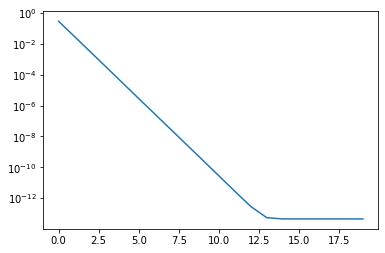

In [12]:
plt.yscale("log")
plt.plot(RMSE)

In [13]:
bestN = np.argmin(RMSE)
print(("RMSE = %.20E with %d decimal digits")% (np.min(RMSE),bestN))

RMSE = 4.62282833670671481202E-14 with 15 decimal digits


In [14]:
np.savetxt('best.csv', np.transpose([Id, y_hat]), 
               fmt=['%.0f','%.'+str(bestN)+'f'], 
               delimiter=',', header='Id,y', comments='' )

In [15]:
tst = np.genfromtxt ('test.csv', delimiter=",")[1:]
Id = tst[:,0]
X=tst[:,1:]

In [16]:
#y_hat = np.matmul(X,np.ones((n_features, 1)))[:,0]/n_features
y_hat = np.mean(X,axis=1)


In [17]:
testN = 50
RMSE = []
print(("y_hat[0]=\t"+"%."+str(testN)+"E")% (y_hat[0]))

for i in range(testN):
    np.savetxt('out.csv', np.transpose([Id,y_hat]), fmt=['%.0f','%.'+str(i)+'f'], delimiter=',', header='Id,y')
    y_f = np.genfromtxt ('out.csv', delimiter=",")[:,1]
    #print(np.shape(y_f))
    RMSE.append(mean_squared_error(y_f, y_hat)**0.5)
    print(("y_f_"+str(i)+"[0]=\t"+"%."+str(testN)+"E")% (y_f[0]))



y_hat[0]=	-6.60024234902313509110172162763774394989013671875000E+01
y_f_0[0]=	-6.60000000000000000000000000000000000000000000000000E+01
y_f_1[0]=	-6.60000000000000000000000000000000000000000000000000E+01
y_f_2[0]=	-6.60000000000000000000000000000000000000000000000000E+01
y_f_3[0]=	-6.60019999999999953388396534137427806854248046875000E+01
y_f_4[0]=	-6.60023999999999944066075840964913368225097656250000E+01
y_f_5[0]=	-6.60024200000000007548806024715304374694824218750000E+01
y_f_6[0]=	-6.60024229999999931806087261065840721130371093750000E+01
y_f_7[0]=	-6.60024235000000061290847952477633953094482421875000E+01
y_f_8[0]=	-6.60024234899999981962537276558578014373779296875000E+01
y_f_9[0]=	-6.60024234899999981962537276558578014373779296875000E+01
y_f_10[0]=	-6.60024234902000017655154806561768054962158203125000E+01
y_f_11[0]=	-6.60024234902300008798192720860242843627929687500000E+01
y_f_12[0]=	-6.60024234902309956396493362262845039367675781250000E+01
y_f_13[0]=	-6.6002423490231393543581361882388

In [18]:
print(np.argmin(RMSE),min(RMSE))
myscore= 6.0175774956e-14
print(myscore)

17 0.0
6.0175774956e-14


In [19]:
for i in range(testN):
    print(str(i) + ("\t%."+str(testN)+"E")% (RMSE[i]))

0	2.89696094372677515060843234095955267548561096191406E-01
1	2.90995340192743978668943327647866681218147277832031E-02
2	2.88585387531441021902178789559911820106208324432373E-03
3	2.93775643022693548362528348505406938784290105104446E-04
4	2.90141089508760652391095719027092059150163549929857E-05
5	2.84220979926993769725494798361609127823612652719021E-06
6	2.86806087910320554488027454051457532102631375892088E-07
7	2.89512538098264098404183061177472047198477866913890E-08
8	2.92616839761349040451217869726434350763355496383156E-09
9	2.86000428334164743128345321138182935638560877578129E-10
10	2.90242747722197847797022434780564144676806570544159E-11
11	2.87705119699868301820203218882772162184879860546971E-12
12	2.95484107598612891415805844275539875933532518725855E-13
13	3.02802387368436249199210659575414489628553474376282E-14
14	1.42147153057952672710542792045352086263508952293511E-15
15	4.67456962179595514466907434762384987174596528666012E-17
16	6.206335383118182524605952154140288752300277222

In [31]:
np.savetxt('final.csv', np.transpose([Id,y_hat]), fmt=['%d','%.19e'], delimiter=',', header='Id,y',comments='')
